In [32]:
# Necessary Modules

import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create dataframe
file=pd.read_csv('Customer_Churn.csv')

In [3]:
# check df
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# df stats
file.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# check empty values
file.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# check column data types
file.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
print("Unique values in 'Churn':", file['Churn'].unique())
print("Unique values in 'gender':", file['gender'].unique())
print("Unique values in 'Partner':", file['Partner'].unique())
print("Unique values in 'Dependents':", file['Dependents'].unique())
print("Unique values in 'PhoneService':", file['PhoneService'].unique())
print("Unique values in 'MultipleLines':", file['MultipleLines'].unique())
print("Unique values in 'InternetService':", file['InternetService'].unique())
print("Unique values in 'OnlineSecurity':", file['OnlineSecurity'].unique())
print("Unique values in 'OnlineBackup':", file['OnlineBackup'].unique())
print("Unique values in 'DeviceProtection':", file['DeviceProtection'].unique())
print("Unique values in 'TechSupport':", file['TechSupport'].unique())
print("Unique values in 'StreamingTV':", file['StreamingTV'].unique())
print("Unique values in 'StreamingMovies':", file['StreamingMovies'].unique())
print("Unique values in 'Contract':", file['Contract'].unique())
print("Unique values in 'PaperlessBilling':", file['PaperlessBilling'].unique())
print("Unique values in 'PaymentMethod':", file['PaymentMethod'].unique())

Unique values in 'Churn': ['No' 'Yes']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values in 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in 'PaperlessBilling': ['Yes' 'No']
Unique values in 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic

In [8]:
# Mappings

# churn
churn_mapping={'Yes':1,'No':0}
chu_map=file.Churn.map(churn_mapping)
file['Churn']=chu_map

# gender
gender_mapping={'Male':1,'Female':0}
gen_map=file.gender.map(gender_mapping)
file.gender=gen_map

# partner
partner_mapping={'Yes':1,'No':0}
par_map=file.Partner.map(partner_mapping)
file['Partner']=par_map

# dependents
dependents_mapping={'Yes':1,'No':0}
dep_map=file.Dependents.map(dependents_mapping)
file['Dependents']=dep_map

# Phone service
phone_service_mapping={'Yes':1,'No':0}
ph_se_map=file.PhoneService.map(phone_service_mapping)
file.PhoneService=ph_se_map

# multiple lines
multiple_lines_mapping={'Yes':1,'No':0,'No phone service':2}
mu_li_map=file.MultipleLines.map(multiple_lines_mapping)
file.MultipleLines=mu_li_map

# internet service
internet_service_mapping={'DSL':0,'Fiber optic':1,'No':2}
in_se_map=file.InternetService.map(internet_service_mapping)
file.InternetService=in_se_map

# online security
online_security__mapping={'Yes':1,'No':0,'No internet service':2}
on_se_map=file.OnlineSecurity.map(online_security__mapping)
file.OnlineSecurity=on_se_map

# online backup
online_backup_mapping={'Yes':1,'No':0,'No internet service':2}
on_ba_map=file.OnlineBackup.map(online_backup_mapping)
file.OnlineBackup=on_ba_map

# device protection
device_protection_mapping={'Yes':1,'No':0,'No internet service':2}
de_pr_map=file.DeviceProtection.map(device_protection_mapping)
file.DeviceProtection=de_pr_map

# tech support
tech_support_mapping={'Yes':1,'No':0,'No internet service':2}
te_su_map=file.TechSupport.map(tech_support_mapping)
file.TechSupport=te_su_map

# streaming tv
streaming_tv_mapping={'Yes':1,'No':0,'No internet service':2}
st_tv_map=file.StreamingTV.map(streaming_tv_mapping)
file.StreamingTV=st_tv_map

# streaming movies
streaming_movies_mapping={'Yes':1,'No':0,'No internet service':2}
st_mo_map=file.StreamingMovies.map(streaming_movies_mapping)
file.StreamingMovies=st_mo_map

# contract
contract_mapping={'Month-to-month':0,'One year':1,'Two year':2}
co_map=file.Contract.map(contract_mapping)
file.Contract=co_map

# paperless billing
paperless_billing_mapping={'Yes':1,'No':0}
pa_bi_map=file.PaperlessBilling.map(paperless_billing_mapping)
file.PaperlessBilling=pa_bi_map

# payment method
payment_method_mapping={'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,'Credit card (automatic)':3}
pa_me_map=file.PaymentMethod.map(payment_method_mapping)
file.PaymentMethod=pa_me_map


In [9]:
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,0,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1



Correlation with 'Churn':
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.019423
PhoneService        0.011942
gender             -0.008612
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
StreamingTV        -0.205742
StreamingMovies    -0.207256
PaymentMethod      -0.262818
DeviceProtection   -0.281465
OnlineBackup       -0.291449
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


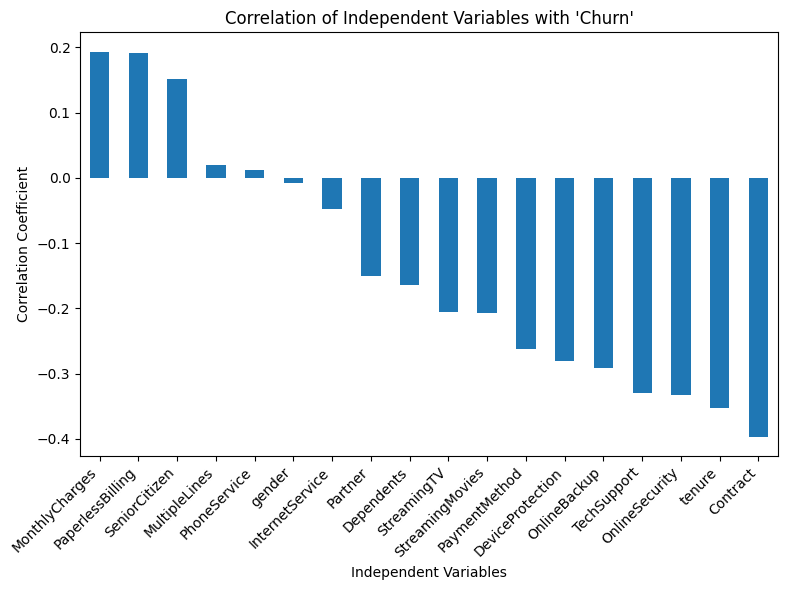

In [10]:
#correlation matrix

def check_churn_correlation(df):
    if 'Churn' not in df.columns:
        print("Error: 'Churn' column not found in the DataFrame.")
        return
    numeric_df = df.select_dtypes(include=['number'])
    if numeric_df.empty:
        print("Warning: DataFrame contains no numeric columns.")
        return
    if 'Churn' not in numeric_df.columns:
        print("Warning: 'Churn' column is not numeric.")
        return
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()
    # Extract the correlation with the 'Churn' column
    churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
    print("\nCorrelation with 'Churn':")
    print(churn_correlation)

    # Visualize the correlation with 'Churn' using a bar plot
    plt.figure(figsize=(8, 6))
    churn_correlation.drop('Churn').plot(kind='bar') # Drop 'Churn' itself from the plot
    plt.title("Correlation of Independent Variables with 'Churn'")
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("Independent Variables")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

check_churn_correlation(file)

In [11]:
file.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [12]:
file.MonthlyCharges=file.MonthlyCharges.astype('int64')

In [13]:
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,1,0,29,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,1,56,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,1,53,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,0,1,...,1,1,0,0,1,0,2,42,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70,151.65,1


In [14]:
file.dtypes

customerID          object
gender               int64
SeniorCitizen        int64
Partner              int64
Dependents           int64
tenure               int64
PhoneService         int64
MultipleLines        int64
InternetService      int64
OnlineSecurity       int64
OnlineBackup         int64
DeviceProtection     int64
TechSupport          int64
StreamingTV          int64
StreamingMovies      int64
Contract             int64
PaperlessBilling     int64
PaymentMethod        int64
MonthlyCharges       int64
TotalCharges        object
Churn                int64
dtype: object

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

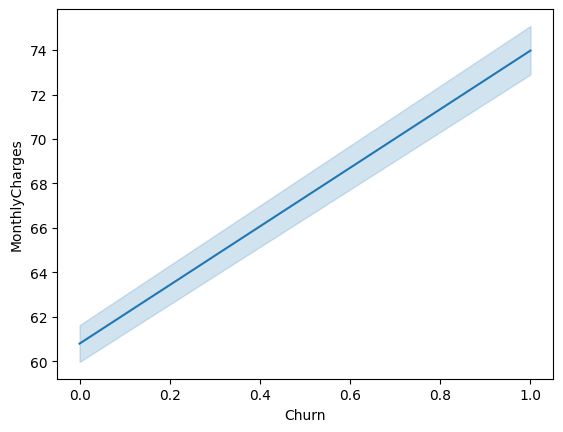

In [15]:
# monthly charges
sb.lineplot(x=chu_map,y=file.MonthlyCharges)

<Axes: xlabel='PaperlessBilling', ylabel='count'>

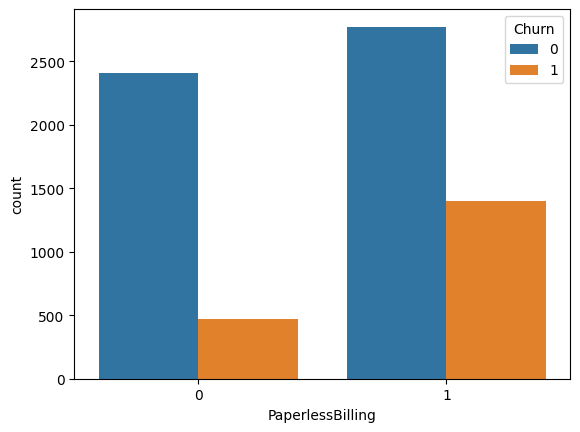

In [16]:
# paperless billing
sb.countplot(x=file.PaperlessBilling,hue=chu_map)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

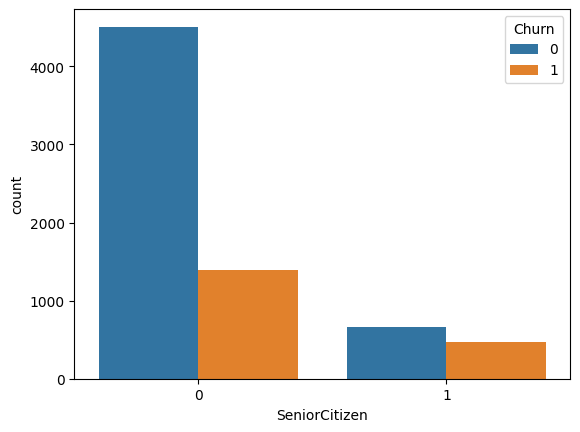

In [17]:
# senior citizen
sb.countplot(x=file.SeniorCitizen,hue=chu_map)

<Axes: xlabel='Partner', ylabel='count'>

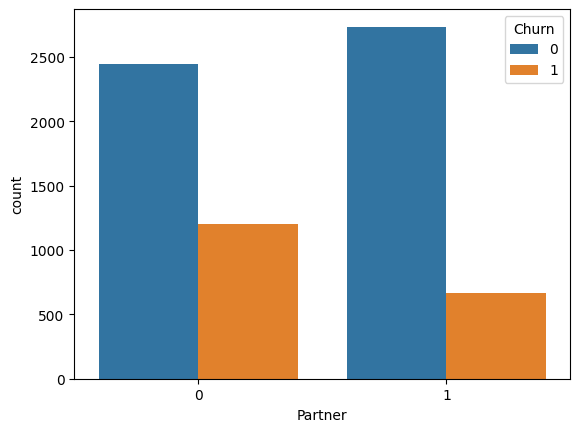

In [18]:
# partner
sb.countplot(x=file.Partner,hue=chu_map)

<Axes: xlabel='Dependents', ylabel='count'>

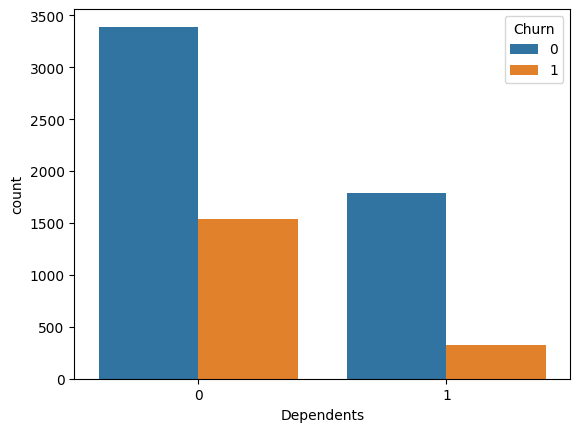

In [19]:
# dependents
sb.countplot(x=file.Dependents,hue=chu_map)

<Axes: xlabel='StreamingTV', ylabel='count'>

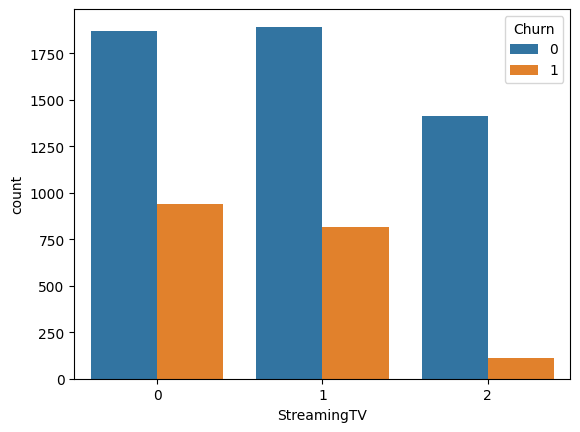

In [20]:
# streaming tv
sb.countplot(x=file.StreamingTV,hue=chu_map)

<Axes: xlabel='StreamingMovies', ylabel='count'>

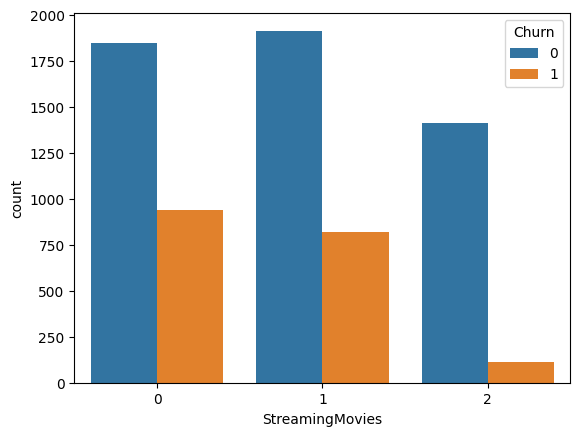

In [21]:
# streaming movies
sb.countplot(x=file.StreamingMovies,hue=chu_map)

<Axes: xlabel='PaymentMethod', ylabel='count'>

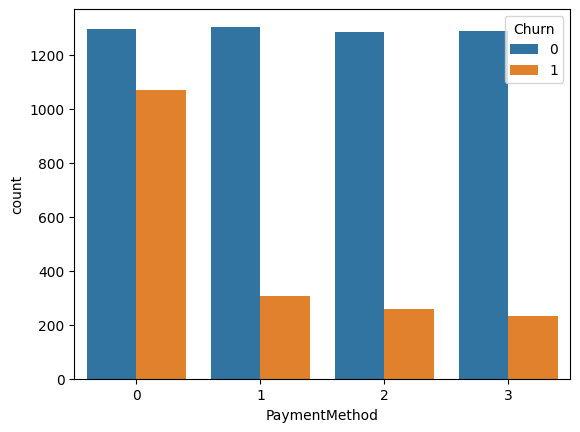

In [22]:
# payment method
sb.countplot(x=file.PaymentMethod,hue=chu_map)

<Axes: xlabel='DeviceProtection', ylabel='count'>

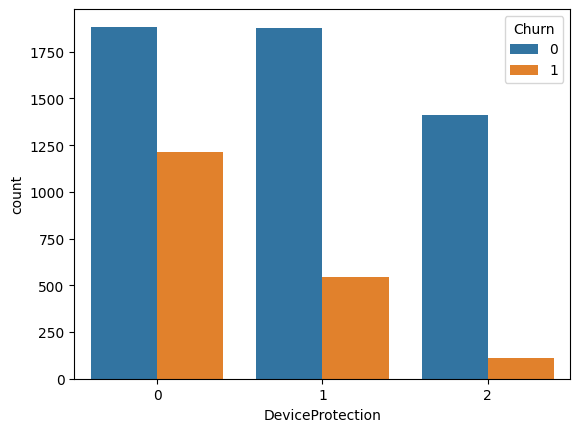

In [23]:
# device protection
sb.countplot(x=file.DeviceProtection,hue=chu_map)

<Axes: xlabel='OnlineBackup', ylabel='count'>

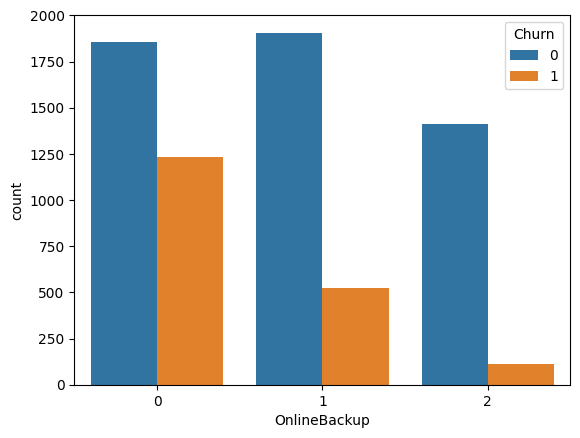

In [24]:
# online backup
sb.countplot(x=file.OnlineBackup,hue=chu_map)

<Axes: xlabel='TechSupport', ylabel='count'>

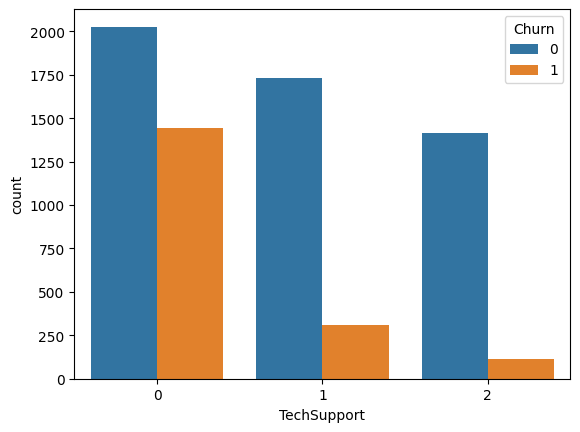

In [25]:
# tech support
sb.countplot(x=file.TechSupport,hue=chu_map)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

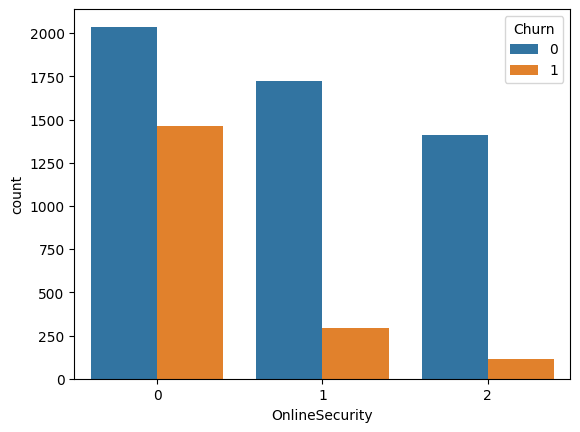

In [26]:
# online security
sb.countplot(x=file.OnlineSecurity,hue=chu_map)

<Axes: xlabel='tenure', ylabel='Churn'>

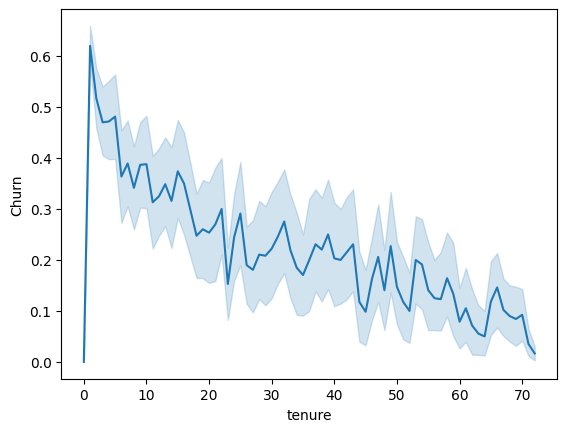

In [27]:
# tenure
sb.lineplot(x=file.tenure,y=chu_map)

<Axes: xlabel='Contract', ylabel='count'>

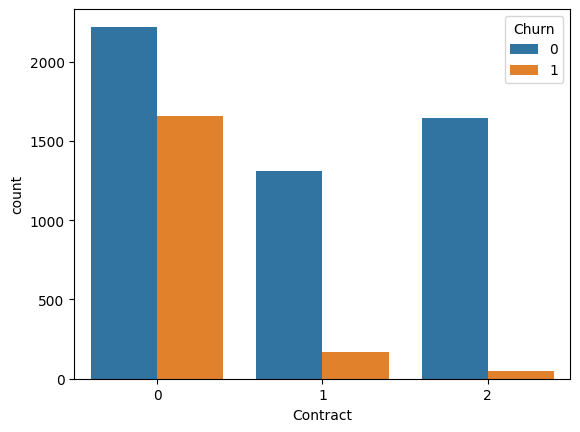

In [28]:
# contract
sb.countplot(x=co_map,hue=chu_map)

In [29]:
file=file.drop(columns=['customerID','MultipleLines','PhoneService','gender','InternetService','Partner','Dependents','TotalCharges'])

In [30]:
file.dtypes

SeniorCitizen       int64
tenure              int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
Churn               int64
dtype: object

In [31]:
X=file.drop(columns=['Churn'])
y=file.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
class LogisticRegression:

    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, lambda_reg=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.lambda_reg = lambda_reg

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            if self.regularization == 'l1':
                dw += (self.lambda_reg / n_samples) * np.sign(self.weights)
            elif self.regularization == 'l2':
                dw += (self.lambda_reg / n_samples) * 2 * self.weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted_proba = self._sigmoid(linear_model)
        return y_predicted_proba
    
    def predict(self, X, threshold=0.5):
        y_predicted_proba = self.predict_proba(X)
        y_predicted = np.array([1 if prob > threshold else 0 for prob in y_predicted_proba])
        return y_predicted

In [ ]:
model = LogisticRegression(learning_rate=0.1, num_iterations=500, regularization='l2', lambda_reg=0.01)
model.fit(X_train, y_train)

In [35]:
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [36]:
print("Predicted Probabilities:")
print(y_pred_proba)
print("\nPredicted Class Labels:")
print(y_pred)
print("\nActual Class Labels (Test Set):")
print(y_test.values)

Predicted Probabilities:
[9.99999687e-01 4.51086407e-46 4.60860332e-61 1.00000000e+00
 8.88237837e-65 2.34198602e-51 6.20836110e-08 3.74019481e-66
 6.25358412e-53 2.28587070e-02 4.60030963e-02 5.55865055e-14
 1.78092007e-16 9.99998065e-01 6.67620618e-20 1.00000000e+00
 9.99797502e-01 1.00000000e+00 4.44848767e-15 9.95787915e-01
 1.00000000e+00 2.21178437e-01 1.04673680e-29 2.67121473e-29
 1.01279155e-18 1.00000000e+00 5.54430378e-27 3.19708616e-16
 1.00000000e+00 7.65808695e-68 1.77108484e-26 9.91034792e-33
 3.30760852e-60 3.41805998e-42 6.30156699e-43 5.25861718e-24
 1.27894118e-83 4.34536427e-06 1.50695815e-43 9.49344954e-47
 1.00000000e+00 8.55483898e-38 1.00000000e+00 3.99005908e-05
 1.28542348e-01 1.85852976e-62 1.00000000e+00 1.00000000e+00
 1.00000000e+00 3.02679043e-13 1.56987539e-22 6.91660009e-20
 3.90310746e-52 5.15451657e-55 4.28799893e-40 2.35505740e-62
 1.25505998e-54 1.00000000e+00 4.96810102e-03 1.00000000e+00
 5.65777840e-13 9.99960534e-01 2.46422334e-14 1.63827987e-55

In [37]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7971631205673759

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       511
           1       0.62      0.68      0.65       194

    accuracy                           0.80       705
   macro avg       0.75      0.76      0.75       705
weighted avg       0.80      0.80      0.80       705


Confusion Matrix:
 [[430  81]
 [ 62 132]]
